### Import Libs

In [1517]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math

### Create Individual

In [1518]:
def create_individual(NUM_QUEENS):
    # TODO: create a random chromosome
  x = [i for i in range(NUM_QUEENS)]
  x = np.random.permutation(x)
  return x

### Generate Population

In [1519]:
def generate_population(population_size,numQueens):
    population = []
    for _ in range(population_size):
        new_individual = create_individual(numQueens)
        population.append(new_individual)

    return population

# stochastic universal selection

In [1520]:
def SUS(population, NUMBER_OF_PARENTS):   # Stochastic Universal Sampling
    fitness_array = population_fitness(population)
    total_fitness = sum(fitness_array)
    random.shuffle(population)
    cumulative = 0
    cumulative_array = []
    for i in range(len(population)):
      cumulative_array.append([population[i],[ cumulative/total_fitness, (cumulative+fitness_array[i])/total_fitness ]])
      cumulative += fitness_array[i]
    point_distance = 1 / NUMBER_OF_PARENTS
    start_point = random.uniform(0, point_distance)
    points = [start_point + i * point_distance for i in range(NUMBER_OF_PARENTS)]
    parents = []
    for point in points:
      for chromosome in cumulative_array:
        if chromosome[1][0] <= point < chromosome[1][1]:
          parents.append(chromosome[0])
    return parents

### Parent Selection

In [1521]:
def parent_selection(population,mue):
    parents = SUS(population,mue)
    #TODO: choose the pairs of parents
    random.shuffle(parents)
    pairs = np.array(parents).reshape(-1,2,len(parents[0]))
    return pairs

### Next Generation Selection

In [1522]:
def next_generation_selection(children_population,mue):
    next_generation = SUS(children_population, mue)
    #TODO: choose the next_generation

    return next_generation

uniform order crossover

In [1523]:
def order_crossover(individual_1, individual_2):
    child_1 = [x for x in individual_1]
    child_2 = [y for y in individual_2]
    shuffle_size = math.floor(len(individual_1)/2)
    size = len(individual_1)
    if size < shuffle_size:
        shuffle_size = size - 1

    index = [*range(size)]
    bit_mask = set(random.sample(index, shuffle_size))
    shuffle_1 = [individual_1[idx] for idx in bit_mask]
    shuffle_2 = [individual_2[idx] for idx in bit_mask]
    inv_bit_mask = set(index) - bit_mask

    parent1 = [individual_1[i] for i in inv_bit_mask]
    parent2 = [individual_2[i] for i in inv_bit_mask]

    order_shuffle_1 = set(shuffle_1)
    order_shuffle_2 = set(shuffle_2)

    can_shuffle = order_shuffle_1 & order_shuffle_2
    remain_shuffle = order_shuffle_1 ^ order_shuffle_2

    # create order from data
    order_shuffle_1 = [x for x in shuffle_1 if x in can_shuffle]
    order_shuffle_2 = [x for x in shuffle_2 if x in can_shuffle]

    parent1 = [x for x in parent1 if x in remain_shuffle]
    parent2 = [x for x in parent2 if x in remain_shuffle]

    order_shuffle_1 += parent1
    order_shuffle_2 += parent2

    i = 0
    for idx in bit_mask:
        child_1[idx] = order_shuffle_2[i]
        child_2[idx] = order_shuffle_1[i]
        i += 1

    return child_1, child_2

### Crossover

In [1524]:
def crossover(pairs):
    offsprings = []
    for pair in pairs:
      child1, child2 = order_crossover(pair[0],pair[1])
      offsprings.append(child1)
      offsprings.append(child2)
    #TODO: implement you crossover algorithm
    return offsprings

### Mutation

In [1525]:
def mutate(population,mutationRate):
    #TODO: implement mutate
    for chromosome in population:
      for row in range(len(chromosome)):
        if random.random() < mutationRate:
          temp = chromosome[row]
          chromosome[row] = chromosome[(row+1) % len(chromosome)]
          chromosome[(row+1) % len(chromosome)] = temp

    return population

### Score Function

In [1526]:
def fitness_score(chromosome):
    fit_score = 0
    #TODO: calculate fitness score
    NUM_QUEENS = len(chromosome)
    for row in range(NUM_QUEENS):
        col = chromosome[row]
        for other_row in range(NUM_QUEENS):
            #queens cannot pair with itself
            if other_row == row:
                continue
            if chromosome[other_row] == col:
                continue
            if other_row + chromosome[other_row] == row + col:
                continue
            if other_row - chromosome[other_row] == row - col:
                continue
            #score++ if every pair of queens are non-attacking.
            fit_score += 1

    #divide by 2 as pairs of queens are commutative
    return int(fit_score/2) + 1


## Calculate Population Fitness

In [1527]:
def population_fitness(population):
    population_fitness = 0
    individuals_fitnesses=[]
    for chromosome in population:
        fitness_sc = fitness_score(chromosome)
        population_fitness += fitness_sc
        individuals_fitnesses.append(fitness_sc)
    return individuals_fitnesses

In [1528]:
def printSolution(chromosome, numQueens):
  for i in range(numQueens):
    s = ""
    for j in range(numQueens):
      if chromosome[i] == j :
        s = s + "[X]"
      else:
        s = s + "[ ]"
    print(s)

### Termination Condition

In [1529]:
def check_end(population,fitness_array,generation,limit) -> bool:
  target = (len(population[1])*(len(population[1])-1)/2)+1
  if generation > limit :
    return True
  for i in range(len(population)):
    if fitness_array[i] == target:
      printSolution(population[i],len(population[i]))
      return True
  return False

### Run Your Algorithms

[ ][ ][ ][ ][X][ ][ ][ ]
[ ][ ][X][ ][ ][ ][ ][ ]
[X][ ][ ][ ][ ][ ][ ][ ]
[ ][ ][ ][ ][ ][ ][X][ ]
[ ][X][ ][ ][ ][ ][ ][ ]
[ ][ ][ ][ ][ ][ ][ ][X]
[ ][ ][ ][ ][ ][X][ ][ ]
[ ][ ][ ][X][ ][ ][ ][ ]


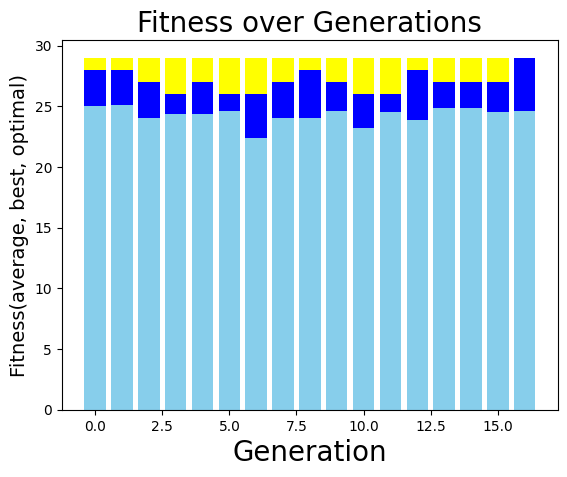

In [1539]:
# The genetic algorithm]
INIT_POPULATION = 16
MEU = 8
NUM_QUEENS = 8
LIMIT = 2000
MUTATION_RATE = 0.05
generation = 0
solution_is_found = False
avg_fitness = []
max_fitness = []
opt_fitness = []
population = generate_population(INIT_POPULATION, NUM_QUEENS)
population = next_generation_selection(population,MEU)
fitness_array = population_fitness(population)
total_fitness = sum(fitness_array)
while not check_end(population,fitness_array,generation,LIMIT):
# TODO: this is a default setup which you maybe need to change.
  pairs = parent_selection(population,MEU)
  children = crossover(pairs)
  mu_children = mutate(population, MUTATION_RATE)
  population = children + population
  population = next_generation_selection(population,MEU)
  fitness_array = population_fitness(population)
  total_fitness = sum(fitness_array)
  generation += 1
  avg_fit =  total_fitness / len(population)
  max_fit = max(fitness_array)
  avg_fitness.append(avg_fit)
  max_fitness.append(max_fit)
  opt_fitness.append((len(population[1])*(len(population[1])-1)/2)+1)

plt.bar(range(generation), opt_fitness, color='yellow', label="optimal")
plt.bar(range(generation), max_fitness, color='blue', label="best")
plt.bar(range(generation), avg_fitness, color='skyblue', label="avg")
plt.xlabel('Generation', fontsize=20)
plt.ylabel('Fitness(average, best, optimal)', fontsize=14)
plt.title('Fitness over Generations', fontsize=20)
plt.show()

### See Your Progress Over Generations